# napari-imagegrains Processing Image Segmentation

This widget allows you to perform image segmentation on your data. You can open it via `Plugins -> ImageGrains -> ImageGrain Processing Widget`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import napari
from napari_imagegrains.imgr_proc_widget import ImageGrainProcWidget
from napari_imagegrains.imgr_demodata_widget import ImageGrainDemoWidget
from pathlib import Path
import os
import shutil

---

## Data preparation

In [3]:
demodata_folder = Path.home().joinpath("imagegrains/")
if demodata_folder.exists() and demodata_folder.is_dir():
    shutil.rmtree(demodata_folder)

In [4]:
viewer = napari.Viewer()
demo_widget = ImageGrainDemoWidget(viewer=viewer)
demo_widget._on_click_download_demodata()

self = demo_widget.widget

"""
viewer = napari.Viewer()
self = ImageGrainProcWidget(viewer=viewer)
viewer.window.add_dock_widget(self);
"""

'\nviewer = napari.Viewer()\nself = ImageGrainProcWidget(viewer=viewer)\nviewer.window.add_dock_widget(self);\n'

In [5]:
exports_folder = Path.home().joinpath("imagegrains/exports/")
if not exports_folder.exists():
    os.makedirs(exports_folder, exist_ok=True)

In [6]:
self.pred_directory.set_value(exports_folder)

---

## Define folder locations

When using the demo data provided, you start with a default situation. Here, you see that one model is already selected from the default model folder and displayed in the model list. Equally, one image is already selected from the default image folder, displayed in an image list and also shown in the napari viewer.

Under custom conditions, you start by indicationg with `Select model folder` and `Select image folder` where your models and images are located. They get displayed in a model and an image list. By clicking on them, you can select individual models and images to work with. 

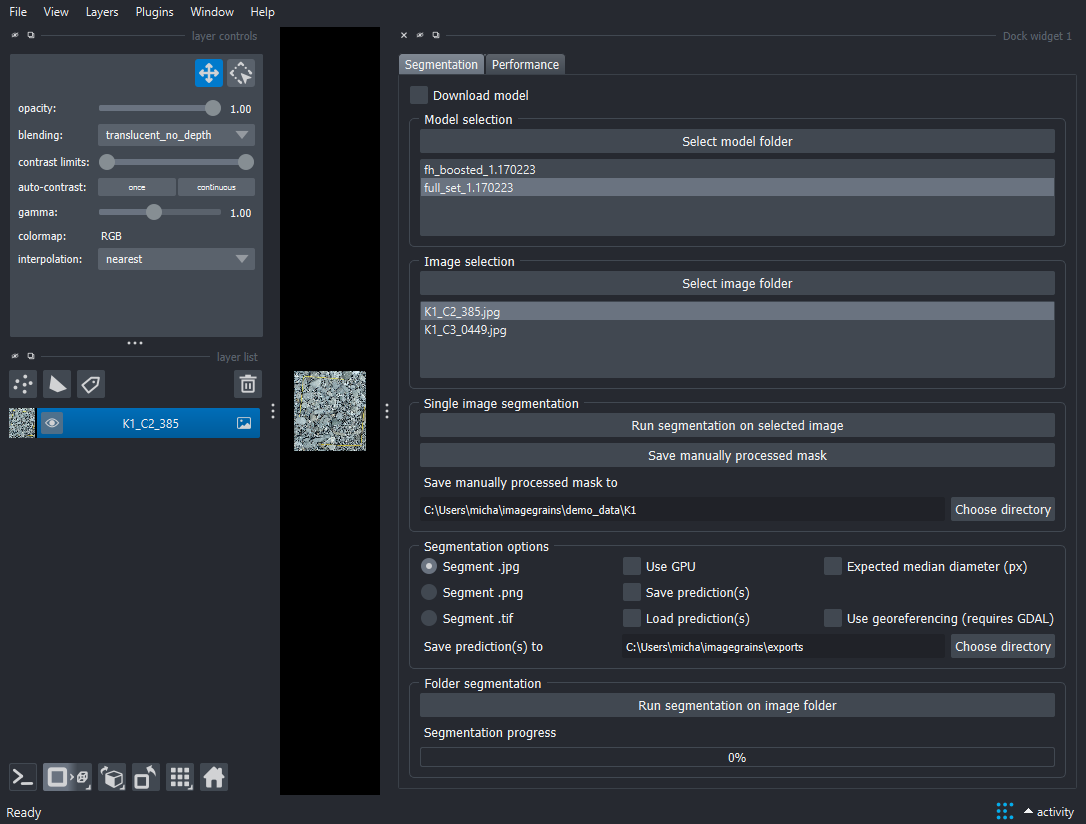

In [7]:
napari.utils.NotebookScreenshot(viewer)

---

## Explore image segmentation

You can explore the image segmentation function by chosing `Run segmentation on selected image`. The segmentation prediction (mask) will be displayed in the viewer on top of the selected image. Under `Segmentation options` you can check the `Save prediction(s)` checkbox in order to save the segmentation mask in the path you provide in `Save prediction(s) to`.

In [8]:
self.check_save_mask.setChecked(True)
self._on_click_segment_single_image()

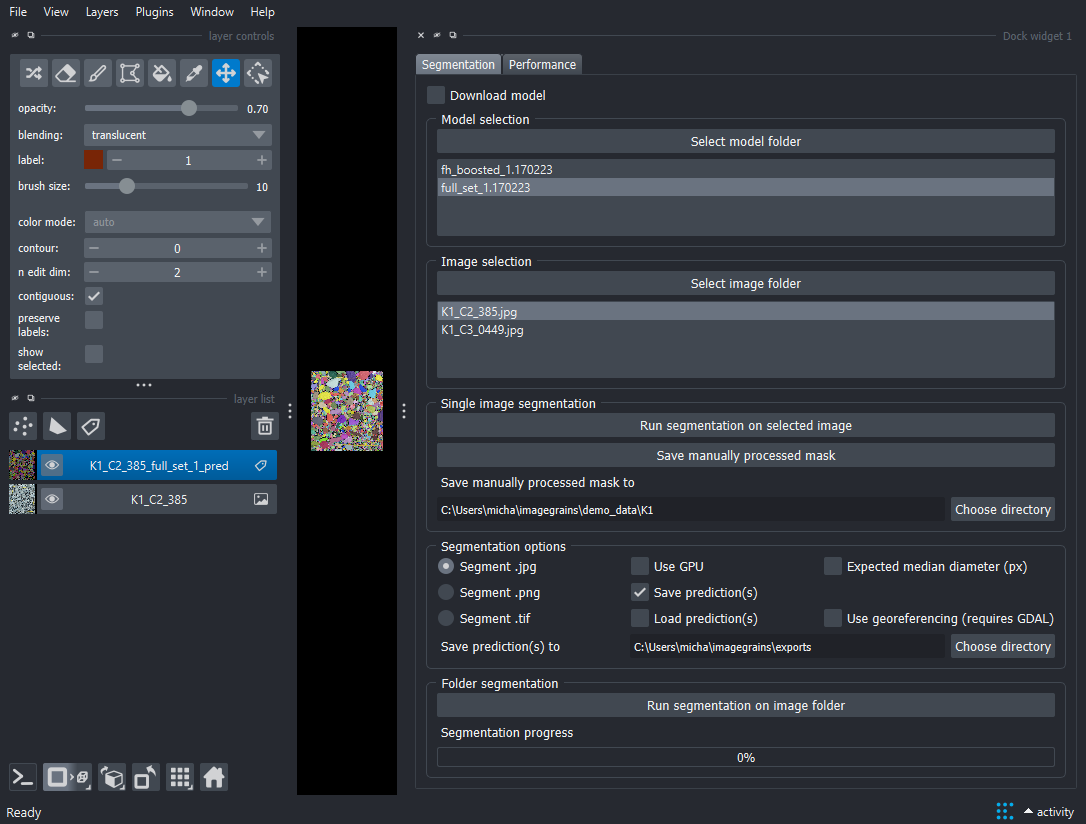

In [9]:
napari.utils.NotebookScreenshot(viewer)

---

## Manually process segmentation mask

You can manually process the segmentation prediction by setting the `label` to `0` and performing drawings. By clicking on `Save manually processed mask` you can save the processed mask in the path below.

---

## Segmentation options

### Load initial prediction

If you want to reload the initial prediction, check `Load prediction(s)`, select another image from the image list and then select the initial image again.

In [10]:
self.check_load_saved_prediction_mask.setChecked(False)
self.image_list.setCurrentRow(1)
self.check_load_saved_prediction_mask.setChecked(True)
self.image_list.setCurrentRow(0)

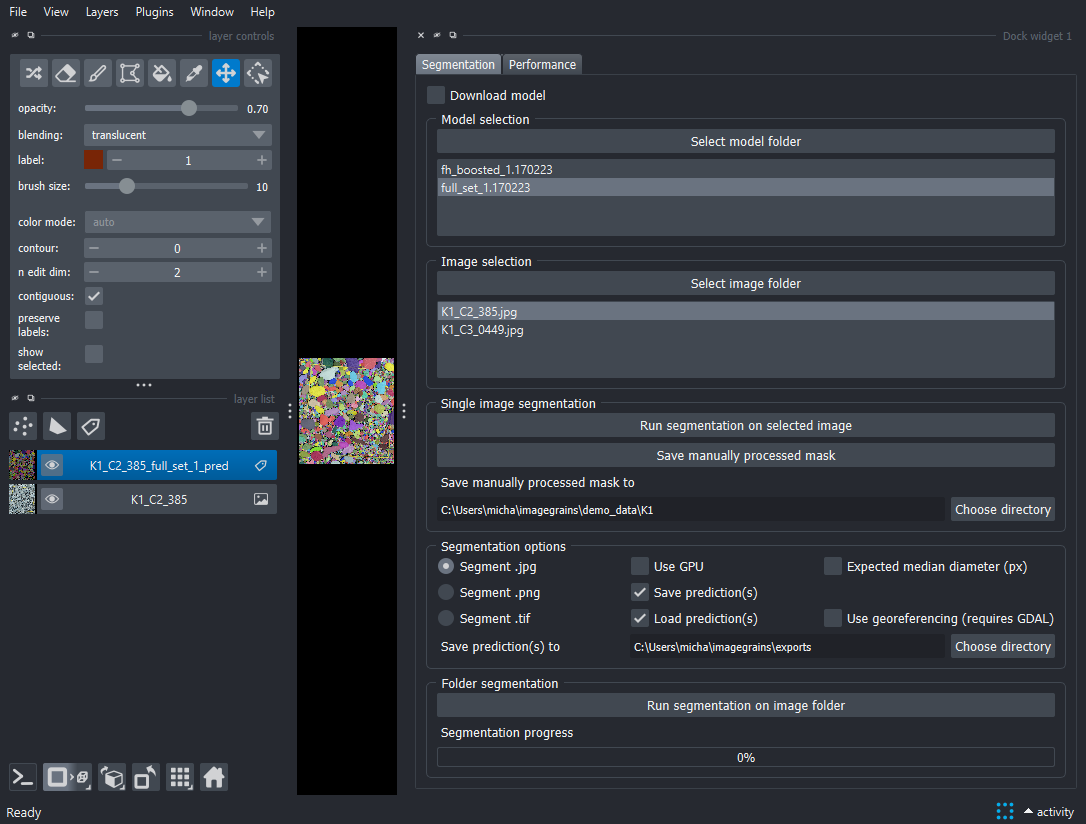

In [11]:
napari.utils.NotebookScreenshot(viewer)

In [12]:
self.check_load_saved_prediction_mask.setChecked(False)

### Expected median diameter

You can change the expected median diameter. Check `Expected median diameter` to acitvate a slider. Choose your expected median diameter (e.g. 50 pixels) and `Run segmentation on selected image` again to see the difference.

In [13]:
self.image_list.setCurrentRow(1)
self.image_list.setCurrentRow(0)

In [14]:
self.check_change_diameter.setChecked(True)
self.qls_expected_median_diameter.setValue(50)
self._on_click_segment_single_image()

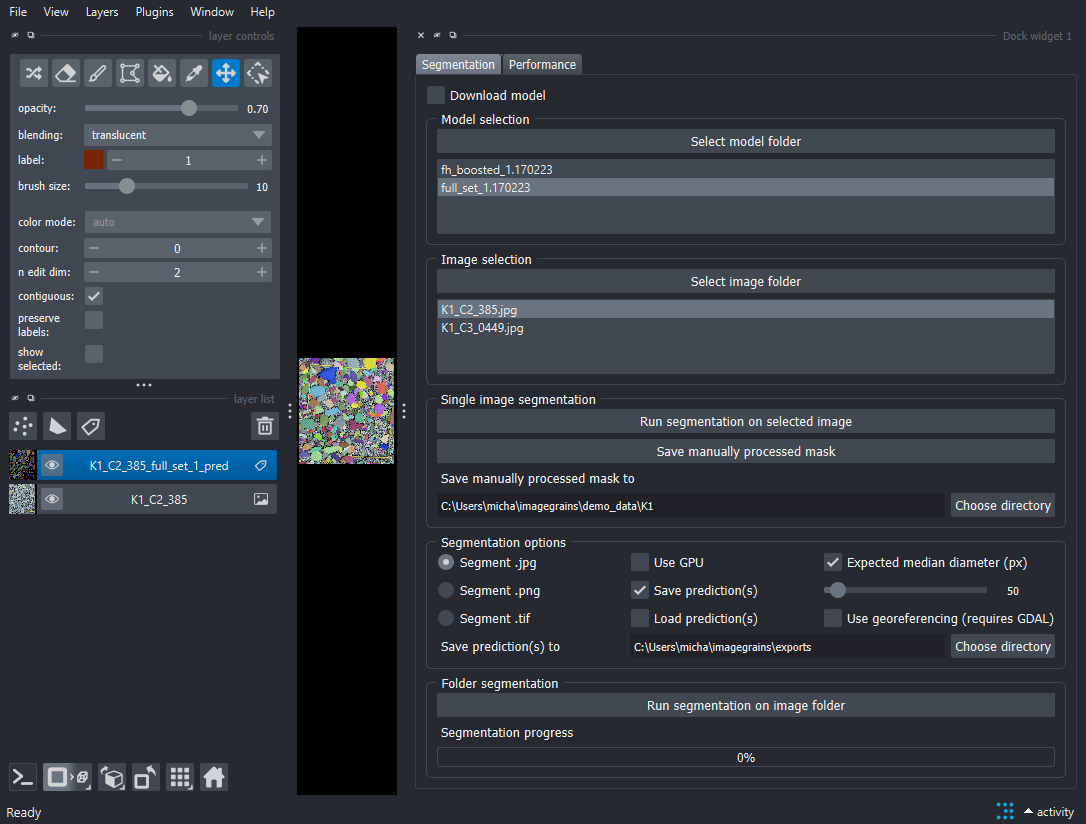

In [15]:
napari.utils.NotebookScreenshot(viewer)

### Use georeferencing (requires GDAL)

In case that your image has georeferencing data, this data can be transferred to the prediction mask. Check `Use georeferencing (requires GDAL)` for that. This option requires the installation of the GDAL library. In addition, it is only available when iterating over an entire folder of images, not for single image use.

### Use GPU

Check `Use GPU` to speed up image segmentation. This option requires a CUDA compatible GPU on your local machine.

---

## Segment all relevant images in a folder

By clicking `Run segmentation on image folder` you can segment all images that fullfill certain criteria in a folder. You can choose to either `Segment .jpg` or `Segment .png` or `Segment .tif` images at a time, depending whether you use jpg/jpeg, png or tif/tiff image formats. In case that an image name contains a flag such as `pred`, `flow`, `mask` or `composite`, folder segmentation will not occur and you will obtain a warning instead.

In [16]:
self.viewer.layers.clear()
self.qls_expected_median_diameter.setValue(17)
self.check_change_diameter.setChecked(False)
self.check_save_mask.setChecked(True)
self._on_click_segment_image_folder()

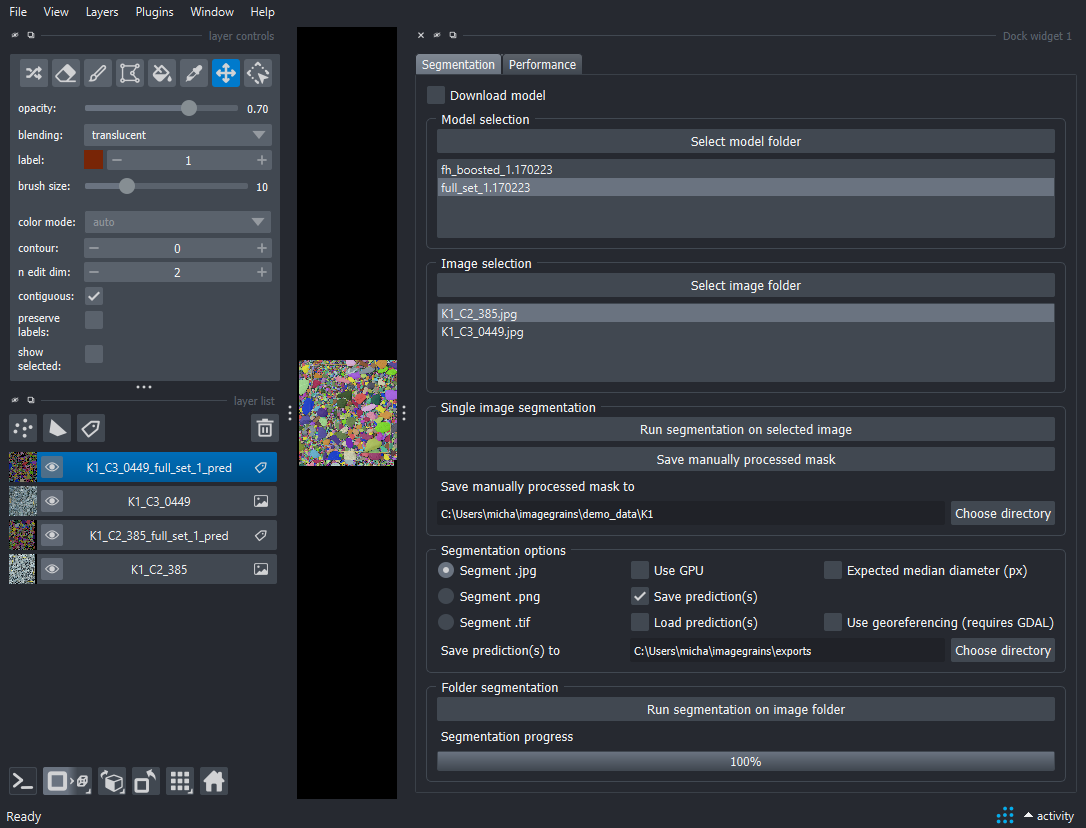

In [17]:
napari.utils.NotebookScreenshot(viewer)

---

## Download a model from a repository

You have the option to download additional models from Zenodo or Github. Check the `Download model` checkbox to activate the model download panel.

In [18]:
self.viewer.layers.clear()
self.check_save_mask.setChecked(False)
self.image_list.setCurrentRow(0)
self.check_download_model.setChecked(True)

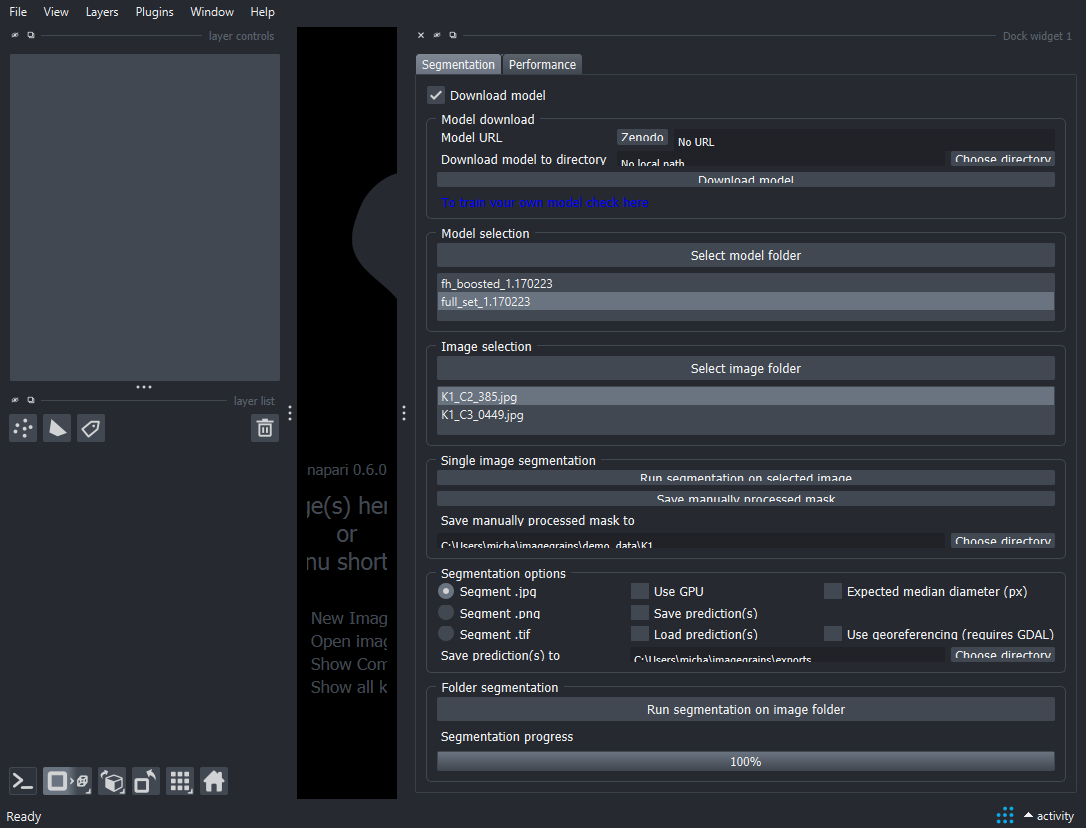

In [19]:
napari.utils.NotebookScreenshot(viewer)

### Manual and automate model download

You can click the `Zenodo` button to be directed to the model repository on Zenodo. You can manually download individual models from here. Alternatively, you can copy the link of the model you are interested in an paste it in the `Model URL` box. After selecting a download directory you can click on `Download model` to save it on your computer.

In [23]:
self.repo_model_path_display.setText("https://zenodo.org/records/15309324/files/IG2baseline.260424?download=1")
self.local_directory_model_path_display.set_value(Path.home().joinpath("imagegrains/models"))
self._on_click_download_model()

In [24]:
self.model_list.update_from_path(self.model_folder)
self.model_list.setCurrentRow(0)

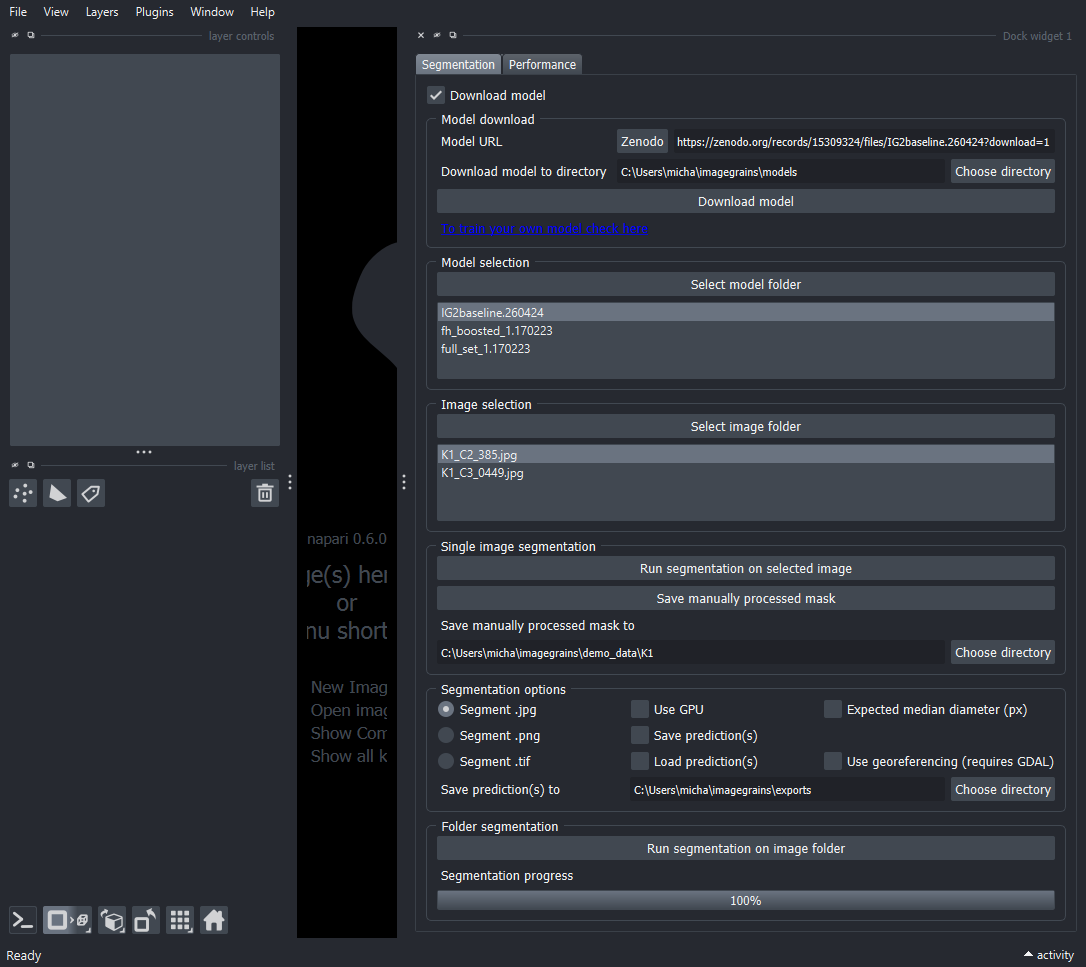

In [25]:
napari.utils.NotebookScreenshot(viewer)

---